## BREAKING IMAGE CAPTCHA CNN MODEL WITH CIFAR-10 Dataset

In [33]:
### Import various libraries ###
import tensorflow as tf 
import numpy as np
import graphviz
from keras.callbacks import ModelCheckpoint
import pydot
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Import CIFAR-10 Data ###
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [3]:
### Shape of the Training data ###
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
### Shape of the Test data ###
print(Y_train.shape)
print(Y_test.shape)

(50000, 1)
(10000, 1)


In [5]:
### Dimensionality of Y_train ###
Y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [6]:
### Convert Y_train from a 2 dimensional to 1 dimensional array ###
Y_train = Y_train.reshape(-1,)
Y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

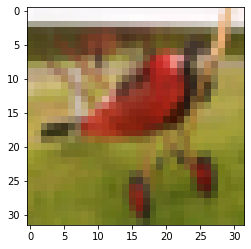

In [7]:
### Plot sample image ###
plt.imshow(X_train[35])

In [8]:
### Assign the classes with their actual names and not numbered labels ###
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

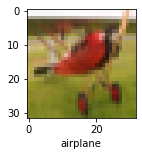

In [9]:
### Plot sample image again with the proper class label ###
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    
plot_sample(X_train,Y_train,35)

In [10]:
### Normalize data by dividing both X train test by 255 ###
X_train = X_train / 255.0
X_test = X_test / 255.0

### Model 1 - Base Model

In [12]:
### Build a convolutional neural network to compare its performance ###
cnetwork = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

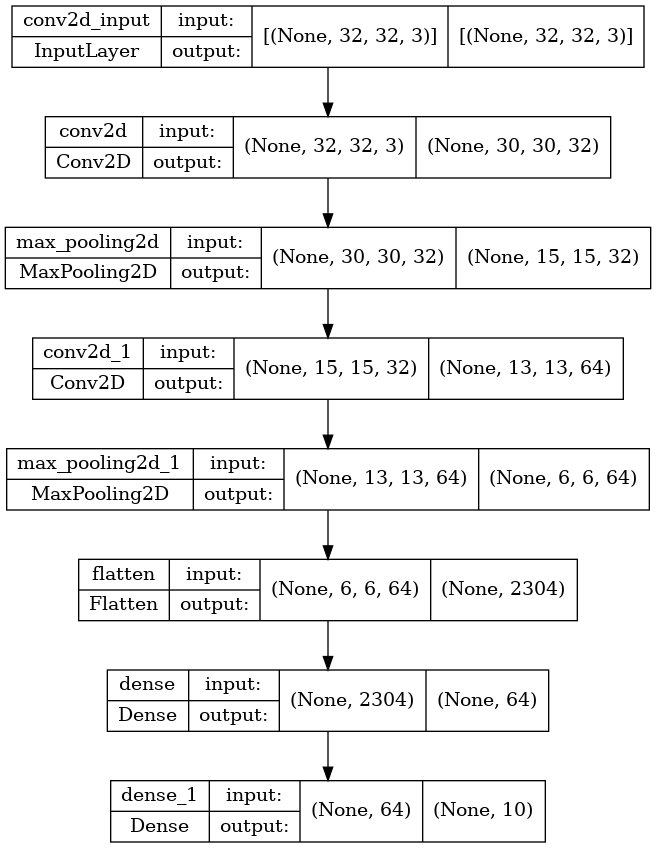

In [13]:
### Print network for viewing ###
plot_model(cnetwork, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [14]:
### Compile and Fit the model ###
cnetwork.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fitting the model with batch size of 128 and 15 training epochs ###
history = cnetwork.fit(X_train, 
                    Y_train, 
                    epochs=15,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/15
391/391 [==============================] - 7s 17ms/step - loss: 1.5849 - accuracy: 0.4288 - val_loss: 1.3678 - val_accuracy: 0.5118
Epoch 2/15
391/391 [==============================] - 6s 16ms/step - loss: 1.2645 - accuracy: 0.5555 - val_loss: 1.2072 - val_accuracy: 0.5759
Epoch 3/15
391/391 [==============================] - 6s 16ms/step - loss: 1.1458 - accuracy: 0.6027 - val_loss: 1.1498 - val_accuracy: 0.6009
Epoch 4/15
391/391 [==============================] - 6s 16ms/step - loss: 1.0520 - accuracy: 0.6324 - val_loss: 1.0461 - val_accuracy: 0.6425
Epoch 5/15
391/391 [==============================] - 6s 16ms/step - loss: 0.9915 - accuracy: 0.6550 - val_loss: 1.0046 - val_accuracy: 0.6518
Epoch 6/15
391/391 [==============================] - 6s 16ms/step - loss: 0.9421 - accuracy: 0.6727 - val_loss: 0.9677 - val_accuracy: 0.6704
Epoch 7/15
391/391 [==============================] - 6s 17ms/step - loss: 0.8907 - accuracy: 0.6920 - val_loss: 0.9702 - val_accuracy: 0.6703

In [15]:
cnetwork.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8986 - accuracy: 0.6998


[0.8985741138458252, 0.6998000144958496]

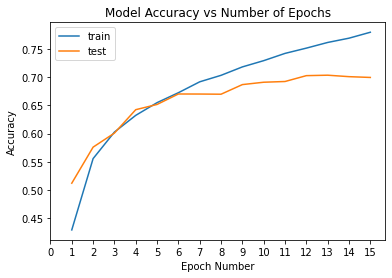

In [16]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(1,1+len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,16,1))
plt.show()

In [17]:
### Training performance ###
## Find highest score for the test data ##
highest_score = max(history.history['val_accuracy'])

## Find the training epoch that has the highest test accuracy score 
epoch_num = np.array(history.history['val_accuracy']).argmax()+1

## Print the performance accuracy and training epoch
print((highest_score, epoch_num))

(0.7038000226020813, 13)


In [18]:
### Classification Report to compare the accuracy for all the classes ###
from sklearn.metrics import confusion_matrix , classification_report
y_pred = cnetwork.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      1000
           1       0.86      0.76      0.80      1000
           2       0.63      0.57      0.60      1000
           3       0.56      0.53      0.54      1000
           4       0.59      0.73      0.65      1000
           5       0.76      0.43      0.55      1000
           6       0.65      0.87      0.75      1000
           7       0.74      0.76      0.75      1000
           8       0.79      0.80      0.79      1000
           9       0.73      0.83      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



### Model 2 - Adjusting the learning rate

In [19]:
### Setting the new learning rate ###
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

### Configuring new optimizer ###
optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

In [20]:
### Build a convolutional neural network to compare its performance ###
cnetwork2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

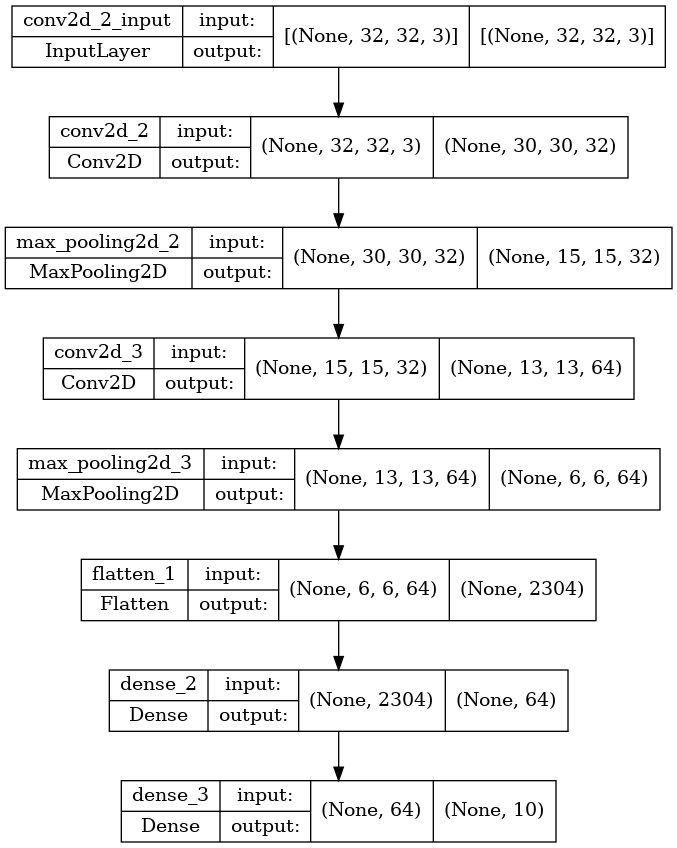

In [21]:
### Print network for viewing ###
plot_model(cnetwork2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
### Compile and Fit the model ###
cnetwork2.compile(optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fitting the model with batch size of 128 and 15 training epochs ###
history2 = cnetwork2.fit(X_train, 
                    Y_train, 
                    epochs=15,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/15
391/391 [==============================] - 7s 17ms/step - loss: 1.7007 - accuracy: 0.3912 - val_loss: 1.4157 - val_accuracy: 0.4931
Epoch 2/15
391/391 [==============================] - 6s 16ms/step - loss: 1.3248 - accuracy: 0.5327 - val_loss: 1.2031 - val_accuracy: 0.5764
Epoch 3/15
391/391 [==============================] - 6s 16ms/step - loss: 1.1627 - accuracy: 0.5936 - val_loss: 1.1071 - val_accuracy: 0.6126
Epoch 4/15
391/391 [==============================] - 6s 16ms/step - loss: 1.0552 - accuracy: 0.6312 - val_loss: 1.0648 - val_accuracy: 0.6279
Epoch 5/15
391/391 [==============================] - 6s 16ms/step - loss: 0.9796 - accuracy: 0.6574 - val_loss: 1.0767 - val_accuracy: 0.6234
Epoch 6/15
391/391 [==============================] - 6s 16ms/step - loss: 0.9156 - accuracy: 0.6793 - val_loss: 0.9500 - val_accuracy: 0.6696
Epoch 7/15
391/391 [==============================] - 6s 16ms/step - loss: 0.8604 - accuracy: 0.7018 - val_loss: 1.0277 - val_accuracy: 0.6443

In [23]:
cnetwork2.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0037 - accuracy: 0.6820


[1.0036606788635254, 0.6819999814033508]

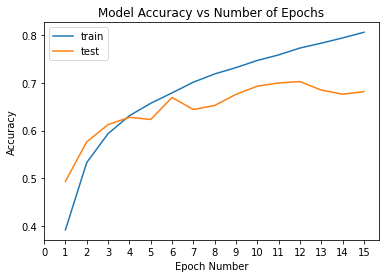

In [24]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history2.history['accuracy'])), history2.history['accuracy'])
plt.plot(range(1,1+len(history2.history['val_accuracy'])), history2.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,16,1))
plt.show()

In [25]:
### Training performance ###
## Find highest score for the test data ##
highest_score2 = max(history2.history['val_accuracy'])

## Find the training epoch that has the highest test accuracy score 
epoch_num2 = np.array(history2.history['val_accuracy']).argmax()+1

## Print the performance accuracy and training epoch
print((highest_score2, epoch_num2))

(0.7031000256538391, 12)


In [26]:
### Classification Report to compare the accuracy for all the classes ###
from sklearn.metrics import confusion_matrix , classification_report
y_pred2 = cnetwork2.predict(X_test)
y_pred_classes2 = [np.argmax(element) for element in y_pred2]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes2))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.73      0.74      1000
           1       0.79      0.82      0.80      1000
           2       0.63      0.48      0.55      1000
           3       0.57      0.43      0.49      1000
           4       0.66      0.59      0.62      1000
           5       0.61      0.59      0.60      1000
           6       0.53      0.91      0.67      1000
           7       0.77      0.75      0.76      1000
           8       0.85      0.72      0.78      1000
           9       0.76      0.79      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



### Model 3 - Learning rate and Dropout

In [27]:
### Setting the new learning rate ###
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

### Configuring new optimizer ###
optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

In [28]:
### Build a convolutional neural network to compare its performance ###
cnetwork3 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [29]:
### Compile and Fit the model ###
cnetwork3.compile(optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fitting the model with batch size of 128 and 20 training epochs ###
history3 = cnetwork3.fit(X_train, 
                    Y_train, 
                    epochs=20,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/20
391/391 [==============================] - 7s 17ms/step - loss: 1.7763 - accuracy: 0.3584 - val_loss: 1.4471 - val_accuracy: 0.4900
Epoch 2/20
391/391 [==============================] - 6s 16ms/step - loss: 1.4137 - accuracy: 0.4991 - val_loss: 1.2385 - val_accuracy: 0.5601
Epoch 3/20
391/391 [==============================] - 6s 16ms/step - loss: 1.2577 - accuracy: 0.5597 - val_loss: 1.1721 - val_accuracy: 0.5888
Epoch 4/20
391/391 [==============================] - 6s 16ms/step - loss: 1.1534 - accuracy: 0.5960 - val_loss: 1.1192 - val_accuracy: 0.6086
Epoch 5/20
391/391 [==============================] - 6s 16ms/step - loss: 1.0788 - accuracy: 0.6244 - val_loss: 1.0648 - val_accuracy: 0.6297
Epoch 6/20
391/391 [==============================] - 6s 16ms/step - loss: 1.0198 - accuracy: 0.6423 - val_loss: 1.0564 - val_accuracy: 0.6265
Epoch 7/20
391/391 [==============================] - 6s 16ms/step - loss: 0.9689 - accuracy: 0.6623 - val_loss: 0.9763 - val_accuracy: 0.6592

In [30]:
cnetwork3.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9282 - accuracy: 0.7102


[0.9281643629074097, 0.7102000117301941]

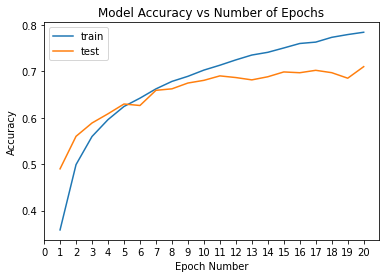

In [31]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history3.history['accuracy'])), history3.history['accuracy'])
plt.plot(range(1,1+len(history3.history['val_accuracy'])), history3.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,21,1))
plt.show()

In [32]:
### Training performance ###
## Find highest score for the test data ##
highest_score3 = max(history3.history['val_accuracy'])

## Find the training epoch that has the highest test accuracy score 
epoch_num3 = np.array(history3.history['val_accuracy']).argmax()+1

## Print the performance accuracy and training epoch
print((highest_score3, epoch_num3))

(0.7102000117301941, 20)


In [33]:
### Classification Report to compare the accuracy for all the classes ###
from sklearn.metrics import confusion_matrix , classification_report
y_pred3 = cnetwork3.predict(X_test)
y_pred_classes3 = [np.argmax(element) for element in y_pred3]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes3))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      1000
           1       0.88      0.75      0.81      1000
           2       0.59      0.60      0.60      1000
           3       0.59      0.49      0.54      1000
           4       0.61      0.72      0.66      1000
           5       0.65      0.60      0.62      1000
           6       0.79      0.76      0.77      1000
           7       0.68      0.79      0.73      1000
           8       0.79      0.83      0.81      1000
           9       0.79      0.82      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



### Model 4 - Batch Normalization and increased Epochs

In [34]:
### Build a convolutional neural network to compare its performance ###
cnetwork4 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

In [35]:
### Compile and Fit the model ###
cnetwork4.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fitting the model with batch size of 128 and 20 training epochs ###
history4 = cnetwork4.fit(X_train, 
                    Y_train, 
                    epochs=20,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/20
391/391 [==============================] - 7s 17ms/step - loss: 1.3294 - accuracy: 0.5301 - val_loss: 1.2929 - val_accuracy: 0.5411
Epoch 2/20
391/391 [==============================] - 6s 16ms/step - loss: 1.0149 - accuracy: 0.6469 - val_loss: 1.2104 - val_accuracy: 0.5869
Epoch 3/20
391/391 [==============================] - 6s 16ms/step - loss: 0.9112 - accuracy: 0.6844 - val_loss: 1.3599 - val_accuracy: 0.5537
Epoch 4/20
391/391 [==============================] - 6s 16ms/step - loss: 0.8434 - accuracy: 0.7088 - val_loss: 1.3250 - val_accuracy: 0.5908
Epoch 5/20
391/391 [==============================] - 6s 16ms/step - loss: 0.7831 - accuracy: 0.7269 - val_loss: 0.9450 - val_accuracy: 0.6797
Epoch 6/20
391/391 [==============================] - 6s 16ms/step - loss: 0.7375 - accuracy: 0.7433 - val_loss: 0.9939 - val_accuracy: 0.6676
Epoch 7/20
391/391 [==============================] - 6s 16ms/step - loss: 0.6963 - accuracy: 0.7575 - val_loss: 1.0486 - val_accuracy: 0.6599

In [36]:
cnetwork4.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1718 - accuracy: 0.6926


[1.1718446016311646, 0.6926000118255615]

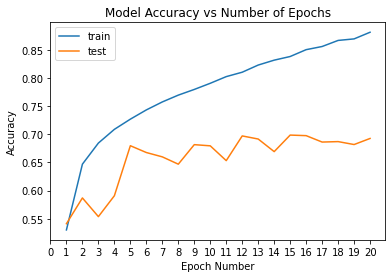

In [37]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history4.history['accuracy'])), history4.history['accuracy'])
plt.plot(range(1,1+len(history4.history['val_accuracy'])), history4.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,21,1))
plt.show()

In [38]:
### Training performance ###
## Find highest score for the test data ##
highest_score4 = max(history4.history['val_accuracy'])

## Find the training epoch that has the highest test accuracy score 
epoch_num4 = np.array(history4.history['val_accuracy']).argmax()+1

## Print the performance accuracy and training epoch
print((highest_score4, epoch_num4))

(0.6985999941825867, 15)


In [39]:
### Classification Report to compare the accuracy for all the classes ###
from sklearn.metrics import confusion_matrix , classification_report
y_pred4 = cnetwork4.predict(X_test)
y_pred_classes4 = [np.argmax(element) for element in y_pred4]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes4))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.72      0.70      1000
           1       0.81      0.81      0.81      1000
           2       0.63      0.52      0.57      1000
           3       0.57      0.45      0.51      1000
           4       0.57      0.76      0.65      1000
           5       0.54      0.68      0.60      1000
           6       0.83      0.75      0.79      1000
           7       0.78      0.67      0.72      1000
           8       0.77      0.82      0.79      1000
           9       0.80      0.76      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



### Model 5 - Dropout only

In [40]:
### Build a convolutional neural network to compare its performance ###
cnetwork5 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [41]:
### Compile and Fit the model ###
cnetwork5.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fitting the model with batch size of 128 and 20 training epochs ###
history5 = cnetwork5.fit(X_train, 
                    Y_train, 
                    epochs=20,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/20
391/391 [==============================] - 7s 16ms/step - loss: 1.7304 - accuracy: 0.3668 - val_loss: 1.3903 - val_accuracy: 0.5021
Epoch 2/20
391/391 [==============================] - 6s 16ms/step - loss: 1.4182 - accuracy: 0.4890 - val_loss: 1.2605 - val_accuracy: 0.5578
Epoch 3/20
391/391 [==============================] - 6s 16ms/step - loss: 1.3067 - accuracy: 0.5353 - val_loss: 1.1901 - val_accuracy: 0.5858
Epoch 4/20
391/391 [==============================] - 6s 16ms/step - loss: 1.2305 - accuracy: 0.5624 - val_loss: 1.1300 - val_accuracy: 0.6006
Epoch 5/20
391/391 [==============================] - 6s 16ms/step - loss: 1.1689 - accuracy: 0.5860 - val_loss: 1.0718 - val_accuracy: 0.6279
Epoch 6/20
391/391 [==============================] - 6s 16ms/step - loss: 1.1225 - accuracy: 0.6044 - val_loss: 1.0389 - val_accuracy: 0.6360
Epoch 7/20
391/391 [==============================] - 6s 16ms/step - loss: 1.0738 - accuracy: 0.6207 - val_loss: 0.9897 - val_accuracy: 0.6516

In [42]:
cnetwork5.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9084 - accuracy: 0.6929


[0.9083669185638428, 0.6929000020027161]

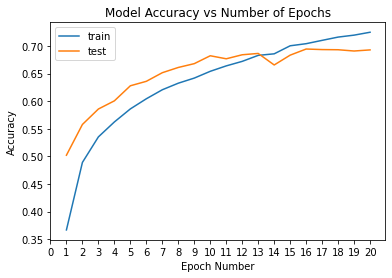

In [43]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history5.history['accuracy'])), history5.history['accuracy'])
plt.plot(range(1,1+len(history5.history['val_accuracy'])), history5.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,21,1))
plt.show()

In [44]:
### Training performance ###
## Find highest score for the test data ##
highest_score5 = max(history5.history['val_accuracy'])

## Find the training epoch that has the highest test accuracy score 
epoch_num5 = np.array(history5.history['val_accuracy']).argmax()+1

## Print the performance accuracy and training epoch
print((highest_score5, epoch_num5))

(0.6945000290870667, 16)


In [45]:
### Classification Report to compare the accuracy for all the classes ###
from sklearn.metrics import confusion_matrix , classification_report
y_pred5 = cnetwork5.predict(X_test)
y_pred_classes5 = [np.argmax(element) for element in y_pred5]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes5))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.80      0.86      0.83      1000
           2       0.52      0.67      0.58      1000
           3       0.50      0.54      0.52      1000
           4       0.72      0.56      0.63      1000
           5       0.58      0.61      0.60      1000
           6       0.86      0.65      0.74      1000
           7       0.71      0.77      0.74      1000
           8       0.82      0.79      0.80      1000
           9       0.82      0.74      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.70     10000
weighted avg       0.71      0.69      0.70     10000



## Tyler Model 6

In [142]:
### Build a convolutional neural network to compare its performance ###

# 79% accuracy @ 40 epochs
cnetwork6 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [148]:
### Compile and Fit the model ###
from tensorflow.keras.optimizers import Adam

cnetwork6.compile(optimizer=Adam(amsgrad=True), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fitting the model with batch size of 128 and 20 training epochs ###
history6 = cnetwork6.fit(X_train, 
                    Y_train, 
                    epochs=40,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/40
391/391 [==============================] - 31s 78ms/step - loss: 0.1488 - accuracy: 0.9461 - val_loss: 1.2031 - val_accuracy: 0.7459
Epoch 2/40
391/391 [==============================] - 31s 79ms/step - loss: 0.1423 - accuracy: 0.9497 - val_loss: 1.0372 - val_accuracy: 0.7747
Epoch 3/40
391/391 [==============================] - 32s 81ms/step - loss: 0.1318 - accuracy: 0.9534 - val_loss: 1.1772 - val_accuracy: 0.7543
Epoch 4/40
391/391 [==============================] - 32s 81ms/step - loss: 0.1225 - accuracy: 0.9555 - val_loss: 1.1120 - val_accuracy: 0.7625
Epoch 5/40
391/391 [==============================] - 31s 78ms/step - loss: 0.1109 - accuracy: 0.9606 - val_loss: 1.1118 - val_accuracy: 0.7791
Epoch 6/40
391/391 [==============================] - 31s 78ms/step - loss: 0.1120 - accuracy: 0.9605 - val_loss: 1.0707 - val_accuracy: 0.7830
Epoch 7/40
391/391 [==============================] - 31s 78ms/step - loss: 0.1102 - accuracy: 0.9612 - val_loss: 1.2823 - val_accuracy:

In [149]:
cnetwork6.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.5744 - accuracy: 0.7923


[1.5743733644485474, 0.7922999858856201]

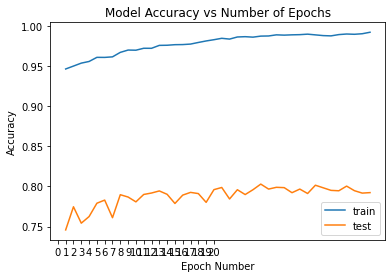

In [150]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history6.history['accuracy'])), history6.history['accuracy'])
plt.plot(range(1,1+len(history6.history['val_accuracy'])), history6.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,21,1))
plt.show()

In [151]:
### Training performance ###
## Find highest score for the test data ##
highest_score6 = max(history6.history['val_accuracy'])

## Find the training epoch that has the highest test accuracy score 
epoch_num6 = np.array(history6.history['val_accuracy']).argmax()+1

## Print the performance accuracy and training epoch
print((highest_score6, epoch_num6))

(0.8029000163078308, 26)


In [152]:
### Classification Report to compare the accuracy for all the classes ###
from sklearn.metrics import confusion_matrix , classification_report
y_pred6 = cnetwork6.predict(X_test)
y_pred_classes6 = [np.argmax(element) for element in y_pred6]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes6))

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      1000
           1       0.93      0.86      0.89      1000
           2       0.71      0.68      0.69      1000
           3       0.63      0.67      0.65      1000
           4       0.71      0.83      0.76      1000
           5       0.75      0.68      0.71      1000
           6       0.77      0.88      0.82      1000
           7       0.81      0.85      0.83      1000
           8       0.93      0.85      0.89      1000
           9       0.88      0.87      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000

